<a href="https://colab.research.google.com/github/smomtahen/LinearRegression/blob/master/degree_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

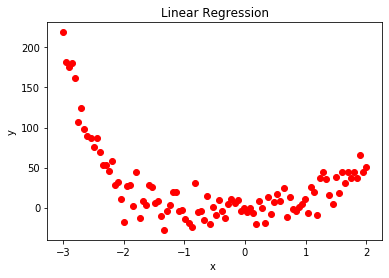

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read the dataframe df from the csv file
df = pd.read_csv("polydata.csv")
# extract x and y values from the corresponding columns in the dataframe 
x = df.loc[:,'x'].values
y = df.loc[:,'y'].values

#print (x)
# now x and y contain the data values from a polynomial

# add your code below
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x=x.reshape(1,-1)
y=y.reshape(1,-1)
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(x, y, color='red')
    plt.plot(x, lin_reg.predict(x), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('x ')
    plt.ylabel('y')
    plt.show()
    return
viz_linear()


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read the dataframe df from the csv file
df = pd.read_csv("polydata.csv")
# extract x and y values from the corresponding columns in the dataframe 
x = df.loc[:,'x'].values
y = df.loc[:,'y'].values
x=x.reshape(1,-1)
y=y.reshape(1,-1)
#print (x)
# now x and y contain the data values from a polynomial

# add your code below
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

poly_predict = poly_reg.predict(X_poly)
poly_mse = mean_squared_error(x, poly_predict)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

55.10366241706642

Best degree 4 with RMSE 1.4113102980882286e-08


Text(0, 0.5, 'RMSE')

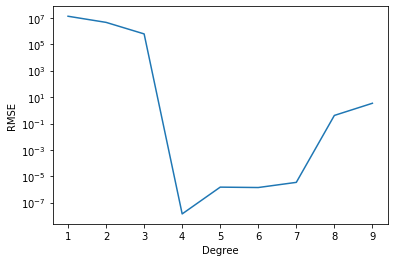

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read the dataframe df from the csv file
df = pd.read_csv("polydata.csv")
# extract x and y values from the corresponding columns in the dataframe 
x = df.loc[:,'x'].values
y = df.loc[:,'y'].values
x=x.reshape(1,-1)
y=y.reshape(1,-1)
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = np.arange(100).reshape(100, 1)
y = X**4 + X**3 + X + 1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')